In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

C:\Users\LAVANYA MARAN\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

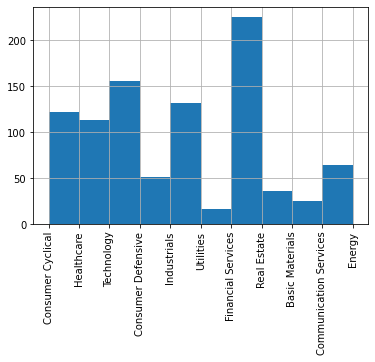

In [3]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [4]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [5]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [6]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [7]:
len(rows)

476

In [8]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


In [9]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               93
Technology                89
Consumer Cyclical         79
Financial Services        68
Healthcare                52
Communication Services    29
Basic Materials           20
Consumer Defensive        19
Energy                    15
Real Estate               11
Utilities                  1
Name: sector, dtype: int64

In [10]:
#df for each sector

df_basic_materials = df.loc[df['sector'] == 'Basic Materials']
df_communication = df.loc[df['sector'] == 'Communication Services']
df_consumer_c = df.loc[df['sector'] == 'Consumer Cyclical']
df_consumer_d = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_financial = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_real_estate = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilites = df.loc[df['sector'] == 'Utilities']

In [11]:
#sectors used in income model: utilities, real estate, financial, consumer defensive, industrials

In [ ]:
#utilities only got 1 stock so use that

# Real Estate Sector

## Filtering Stocks based on Sharpe Ratio

In [31]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [32]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [33]:
sharpe_list = []
for i in range(len(df_real_estate)):
    each = df_real_estate.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [34]:
sharpe_list

[0.149, 0.653, 0.563, 0.812, 0.347, 0.802, 0.368, 0.433, -0.088, 0.16, 0.764]

In [35]:
df_real_estate["sharpe"] = sharpe_list
df_real_estate 

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_15996/2191271859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_estate["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426,0.149
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.653
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.563
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.812
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.580,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.347
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.150,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.802
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.090,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.368
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.850,0.167806,1.112110e+10,...,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521,0.433
614,LSEA,Landsea Homes Corporation,Real Estate,Increase,Below Fair Price,UnderValued,No Data,6.560,-0.037662,3.036040e+08,...,0.531,0.4860,4.315790,12.354049,32.942956,999.00,0.036218,NaN,NaN,-0.088
906,UNIT,Uniti Group Inc.,Real Estate,Increase,Below Fair Price,UnderValued,No Data,11.085,-0.039440,2.616847e+09,...,0.171,0.3400,17.879032,64.824560,21.946654,999.00,0.146837,0.546158,-0.087307,0.160


In [36]:
df2_real_estate  = df_real_estate[df_real_estate ["sharpe"] > 0.3]
df2_real_estate

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.653
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.563
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.812
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.58,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.347
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.15,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.802
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.09,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.368
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.85,0.167806,1.112110e+10,...,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521,0.433
937,SAFE,Safehold Inc.,Real Estate,Increase,Below Fair Price,OverValued,No Data,60.47,0.133037,3.420177e+09,...,1.261,0.3690,34.752872,47.954006,145.164511,999.00,-0.016052,NaN,NaN,0.764


## Correlation between Stocks

In [46]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

In [47]:
returns_list = []
for i in range(len(df2_real_estate)):
    each = df2_real_estate.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [48]:
returns_list

[Symbols         CBRE
 Date                
 2017-03-23       NaN
 2017-03-24 -0.016309
 2017-03-27 -0.035765
 2017-03-28 -0.027468
 2017-03-29 -0.018026
 ...              ...
 2022-03-17  1.605150
 2022-03-18  1.606295
 2022-03-21  1.582832
 2022-03-22  1.620315
 2022-03-23  1.555937
 
 [1260 rows x 1 columns],
 Symbols         EQIX
 Date                
 2017-03-23       NaN
 2017-03-24  0.000103
 2017-03-27 -0.010437
 2017-03-28 -0.008221
 2017-03-29  0.015333
 ...              ...
 2022-03-17  0.855070
 2022-03-18  0.887025
 2022-03-21  0.849633
 2022-03-22  0.853112
 2022-03-23  0.824043
 
 [1260 rows x 1 columns],
 Symbols         SBAC
 Date                
 2017-03-23       NaN
 2017-03-24  0.001354
 2017-03-27 -0.002793
 2017-03-28  0.003555
 2017-03-29  0.013968
 ...              ...
 2022-03-17  1.794125
 2022-03-18  1.798866
 2022-03-21  1.773216
 2022-03-22  1.731990
 2022-03-23  1.712944
 
 [1260 rows x 1 columns],
 Symbols         CTRE
 Date                
 2017-03-23   

In [49]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,CBRE,EQIX,SBAC,CTRE,GOOD,LAMR
Date,,,,,,
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,-0.016309,0.000103,0.001354,0.008202,0.004548,-0.014344
2017-03-27,-0.035765,-0.010437,-0.002793,0.005047,0.007074,-0.016821
2017-03-28,-0.027468,-0.008221,0.003555,0.014511,0.010106,-0.020994
2017-03-29,-0.018026,0.015333,0.013968,0.030284,0.026276,-0.022428
...,...,...,...,...,...,...
2022-03-17,1.605150,0.855070,1.794125,0.165300,0.088428,0.476203
2022-03-18,1.606295,0.887025,1.798866,0.173502,0.099040,0.466814
2022-03-21,1.582832,0.849633,1.773216,0.175394,0.086913,0.480245


<AxesSubplot:xlabel='Date'>

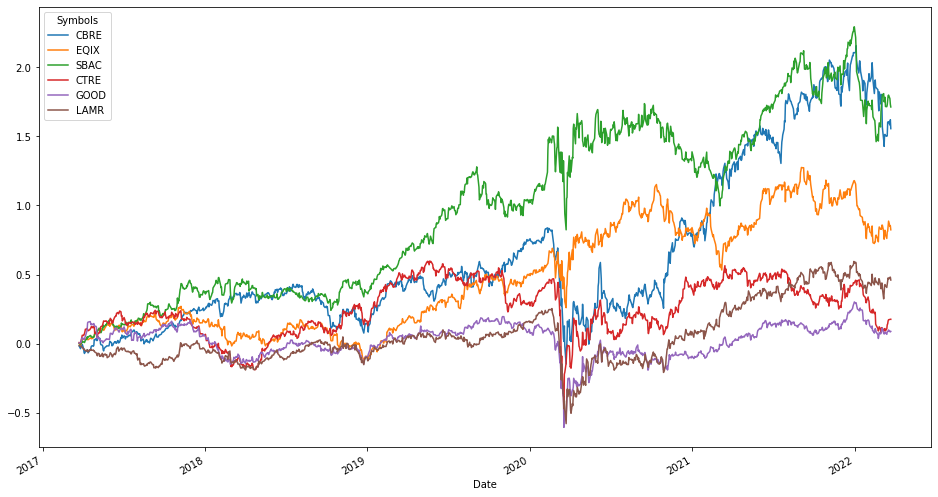

In [50]:
return_series_close.plot(figsize=(16,9))

In [51]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [52]:
highest.dropna(axis=1, how="all")

Symbols
Date
2017-03-23
2017-03-24
2017-03-27
2017-03-28
2017-03-29
...
2022-03-17
2022-03-18
2022-03-21


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

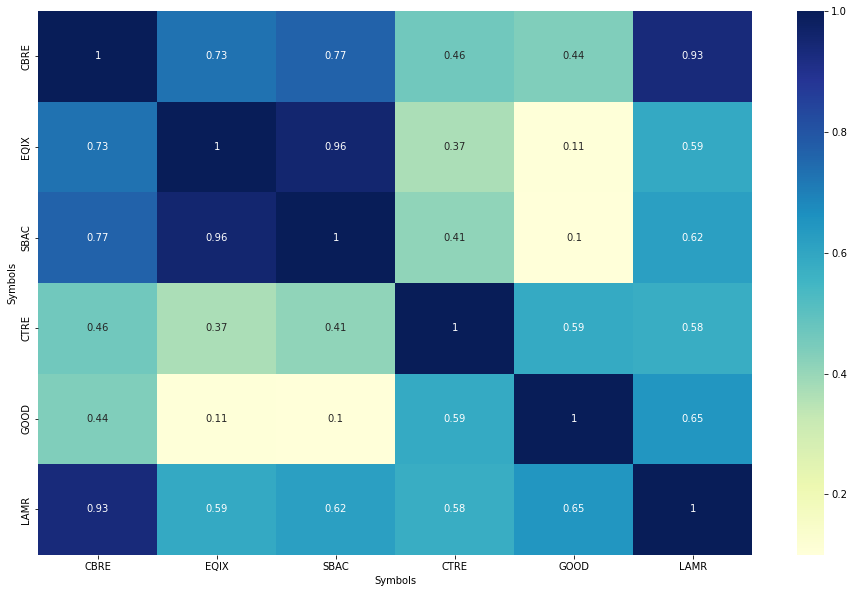

In [53]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [54]:
correlation = correlation[correlation < 0.4]
correlation

Symbols,CBRE,EQIX,SBAC,CTRE,GOOD,LAMR
Symbols,,,,,,
CBRE,NaN,NaN,NaN,NaN,NaN,NaN
EQIX,NaN,NaN,NaN,0.367355,0.106079,NaN
SBAC,NaN,NaN,NaN,NaN,0.099796,NaN
CTRE,NaN,0.367355,NaN,NaN,NaN,NaN
GOOD,NaN,0.106079,0.099796,NaN,NaN,NaN
LAMR,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF

In [55]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [56]:
indexes = []
for i in range(len(df2_real_estate)):
    each = df2_real_estate.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [57]:
chosen_realestate_df = df2_real_estate.iloc[indexes]
chosen_realestate_df #6 stocks for the real estate sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.653
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.563
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.812
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.58,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.347
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.09,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.368
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.85,0.167806,1.112110e+10,...,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521,0.433


In [58]:
chosen_realestate_df.to_csv("selected_stocks_realestate.csv")

# Financial Sector

## Filtering Stocks based on Sharpe Ratio

In [63]:
sharpe_list = []
for i in range(len(df_financial)):
    each = df_financial.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [64]:
sharpe_list

[0.651,
 0.019,
 0.242,
 0.431,
 0.129,
 0.284,
 0.458,
 0.345,
 0.327,
 0.294,
 0.486,
 0.536,
 0.27,
 0.371,
 0.677,
 0.164,
 0.042,
 0.086,
 0.225,
 0.329,
 0.098,
 0.047,
 0.832,
 -0.065,
 0.625,
 0.256,
 0.428,
 0.036,
 0.406,
 0.152,
 0.317,
 0.318,
 0.779,
 -0.039,
 -0.487,
 0.956,
 0.02,
 0.151,
 0.14,
 0.319,
 0.286,
 0.057,
 0.262,
 0.578,
 0.158,
 0.468,
 0.003,
 0.195,
 0.226,
 -0.112,
 0.263,
 0.967,
 0.379,
 0.385,
 0.298,
 0.462,
 0.221,
 0.52,
 0.891,
 0.24,
 0.345,
 1.019,
 0.365,
 0.722,
 0.29,
 0.195,
 0.261,
 0.293]

In [65]:
df_financial["sharpe"] = sharpe_list
df_financial

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_15996/3496381630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.1100,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.651
28,BEN,"Franklin Resources, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,29.9300,0.009948,1.501872e+10,...,3.570,0.0949,7.876316,8.383754,9.619805,19.51,0.165071,0.345803,-0.016066,0.019
31,BK,The Bank of New York Mellon Cor,Financial Services,Increase,Above Fair Price,UnderValued,Average,55.7400,0.123563,4.603126e+10,...,3.925,0.1356,12.196937,14.201275,24.881978,22.79,0.158993,0.298729,0.053724,0.242
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.6800,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.431
111,IVZ,Invesco Ltd,Financial Services,Increase,Above Fair Price,UnderValued,Not Sustainable,22.0725,0.030092,1.017999e+10,...,2.530,0.2130,7.911291,8.724308,17.835618,20.28,0.168718,0.427328,-0.024774,0.129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,VCTR,"Victory Capital Holdings, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,32.2100,0.110286,2.193565e+09,...,3.551,0.1170,6.100378,9.070683,12.392493,999.00,0.150484,NaN,NaN,0.722
915,VLY,Valley National Bancorp,Financial Services,Increase,Above Fair Price,UnderValued,No Data,13.9850,0.063284,5.691251e+09,...,1.110,0.0500,11.654166,12.599098,3.083582,999.00,0.166287,0.360308,0.060302,0.290
922,WAFD,"Washington Federal, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,35.9200,0.109876,2.342835e+09,...,2.390,0.0700,11.777049,15.029287,9.385982,999.00,0.122525,0.323025,0.026584,0.195
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN,0.261


In [66]:
df2_financial = df_financial[df_financial["sharpe"] > 0.3]
df2_financial

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.110,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.651
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.680,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.431
136,MET,"MetLife, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,69.590,0.109501,5.853632e+10,...,5.992,0.0835,9.665278,11.613817,20.356189,14.74,0.172365,0.338744,0.114839,0.458
156,NTRS,Northern Trust Corporation,Financial Services,Increase,Above Fair Price,UnderValued,Average,118.050,0.129134,2.451438e+10,...,6.340,0.1866,15.553360,18.619873,78.251831,24.39,0.160209,0.317205,0.083843,0.345
162,PBCT,People's,Financial Services,Increase,Above Fair Price,UnderValued,Average,21.010,0.099441,8.992805e+09,...,0.702,0.1074,19.275229,29.928774,7.479217,23.64,0.139544,0.359543,0.052798,0.327
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.410,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.486
185,SBNY,Signature Bank,Financial Services,Increase,Above Fair Price,UnderValued,Average,337.790,0.196788,2.048102e+10,...,13.954,0.0632,19.570684,24.207396,83.343349,28.14,0.248947,0.404451,0.169671,0.536
193,TFC,Truist Financial Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,62.230,0.110499,8.307021e+10,...,4.238,0.0460,12.804526,14.683813,13.257890,999.00,0.173580,0.360569,0.086008,0.371
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.560,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.677
291,BWB,"Bridgewater Bancshares, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,17.390,0.032581,4.880816e+08,...,1.310,0.1500,11.006329,13.274809,8.695000,999.00,0.106723,NaN,NaN,0.329


## Correlation between Stocks

In [67]:
returns_list = []
for i in range(len(df2_financial)):
    each = df2_financial.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [68]:
returns_list

[Symbols          AXP
 Date                
 2017-03-23       NaN
 2017-03-24  0.004625
 2017-03-27 -0.003083
 2017-03-28  0.010278
 2017-03-29  0.005267
 ...              ...
 2022-03-17  1.401979
 2022-03-18  1.450154
 2022-03-21  1.429214
 2022-03-22  1.457991
 2022-03-23  1.389774
 
 [1260 rows x 1 columns],
 Symbols          COF
 Date                
 2017-03-23       NaN
 2017-03-24  0.000239
 2017-03-27 -0.019694
 2017-03-28  0.004655
 2017-03-29  0.010742
 ...              ...
 2022-03-17  0.641800
 2022-03-18  0.649678
 2022-03-21  0.604679
 2022-03-22  0.649200
 2022-03-23  0.599308
 
 [1260 rows x 1 columns],
 Symbols          MET
 Date                
 2017-03-23       NaN
 2017-03-24 -0.000768
 2017-03-27 -0.006916
 2017-03-28  0.008261
 2017-03-29  0.002498
 ...              ...
 2022-03-17  0.469486
 2022-03-18  0.475522
 2022-03-21  0.482420
 2022-03-22  0.515832
 2022-03-23  0.496431
 
 [1260 rows x 1 columns],
 Symbols         NTRS
 Date                
 2017-03-23   

In [69]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,AXP,COF,MET,NTRS,PBCT,PNC,SBNY,TFC,TROW,CG,...,FMBH,HWC,NMIH,PMTS,PNNT,SAMG,SNEX,TBBK,TSC,VBTX
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,0.004625,0.000239,-0.000768,-0.011413,0.008949,0.001006,0.001176,0.002031,-0.005425,-1.572327e-02,...,0.011407,0.004619,0.000000,-0.011364,0.005161,-0.025271,-0.010129,0.010309,0.004376,0.023559
2017-03-27,-0.003083,-0.019694,-0.006916,-0.019253,-0.001678,-0.009054,-0.007401,-0.003385,-0.008358,6.289332e-03,...,0.013942,0.006928,0.013575,-0.022727,0.006452,-0.036101,-0.007939,0.030928,0.002188,0.012686
2017-03-28,0.010278,0.004655,0.008261,-0.006341,0.011745,0.008300,0.005672,0.013087,0.002786,-2.220446e-16,...,0.035805,0.025404,0.004525,-0.022727,0.021935,-0.057762,0.000548,0.026804,-0.002188,0.034795
2017-03-29,0.005267,0.010742,0.002498,-0.007148,0.009508,0.000503,0.010445,0.003385,-0.004106,-6.289272e-03,...,0.058935,0.023095,-0.009050,-0.034091,0.041290,-0.039711,0.003011,0.016495,0.008753,0.012323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,1.401979,0.641800,0.469486,0.333641,0.179530,0.618629,1.188490,0.327617,1.155279,1.966038e+00,...,0.290558,0.256351,0.889593,-0.283636,-0.015484,0.432491,1.068437,5.171134,0.399125,0.499456
2022-03-18,1.450154,0.649678,0.475522,0.328222,0.178971,0.617790,1.162620,0.321300,1.151760,1.974843e+00,...,0.273764,0.249423,0.900452,-0.271818,-0.024516,0.422383,1.070901,5.094845,0.401750,0.480971
2022-03-21,1.429214,0.604679,0.482420,0.320152,0.190716,0.618125,1.150377,0.322653,1.135924,1.920755e+00,...,0.277250,0.251270,0.917647,-0.259091,-0.010323,0.443321,1.090337,5.043299,0.406565,0.441464


<AxesSubplot:xlabel='Date'>

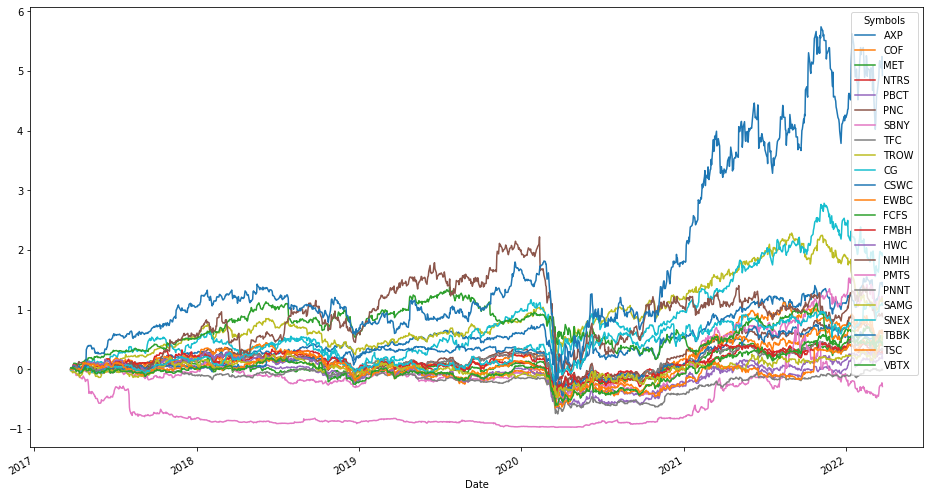

In [70]:
return_series_close.plot(figsize=(16,9))

In [71]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [72]:
highest.dropna(axis=1, how="all")

Symbols
Date
2017-03-23
2017-03-24
2017-03-27
2017-03-28
2017-03-29
...
2022-03-17
2022-03-18
2022-03-21


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

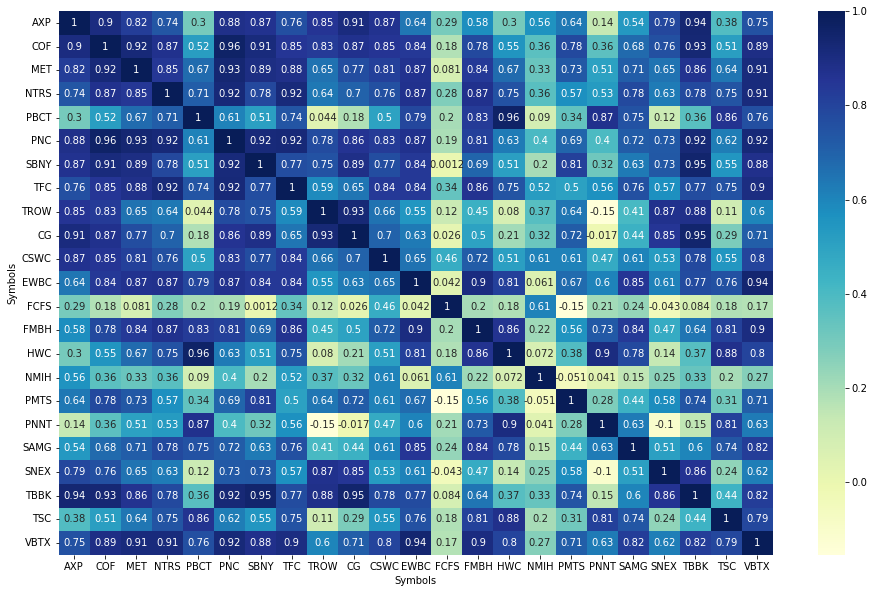

In [73]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [74]:
correlation = correlation[correlation < 0.4]
correlation

Symbols,AXP,COF,MET,NTRS,PBCT,PNC,SBNY,TFC,TROW,CG,...,FMBH,HWC,NMIH,PMTS,PNNT,SAMG,SNEX,TBBK,TSC,VBTX
Symbols,,,,,,,,,,,,,,,,,,,,,
AXP,NaN,NaN,NaN,NaN,0.300220,NaN,NaN,NaN,NaN,NaN,...,NaN,0.296907,NaN,NaN,0.137518,NaN,NaN,NaN,0.383453,NaN
COF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.362971,NaN,0.358162,NaN,NaN,NaN,NaN,NaN
MET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.329100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NTRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.364866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PBCT,0.300220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044142,0.180677,...,NaN,NaN,0.090370,0.342667,NaN,NaN,0.118385,0.364986,NaN,NaN
PNC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.397401,NaN,NaN,NaN,NaN,NaN
SBNY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.201203,NaN,0.318271,NaN,NaN,NaN,NaN,NaN
TFC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TROW,NaN,NaN,NaN,NaN,0.044142,NaN,NaN,NaN,NaN,NaN,...,NaN,0.080020,0.373341,NaN,-0.153870,NaN,NaN,NaN,0.107207,NaN


## Final DF for Financial

In [75]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [76]:
indexes = []
for i in range(len(df2_financial)):
    each = df2_financial.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [77]:
chosen_financial_df = df2_financial.iloc[indexes]
chosen_financial_df #23 stocks for financial sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.11,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.651
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.68,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.431
136,MET,"MetLife, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,69.59,0.109501,5.853632e+10,...,5.992,0.0835,9.665278,11.613817,20.356189,14.74,0.172365,0.338744,0.114839,0.458
156,NTRS,Northern Trust Corporation,Financial Services,Increase,Above Fair Price,UnderValued,Average,118.05,0.129134,2.451438e+10,...,6.340,0.1866,15.553360,18.619873,78.251831,24.39,0.160209,0.317205,0.083843,0.345
162,PBCT,People's,Financial Services,Increase,Above Fair Price,UnderValued,Average,21.01,0.099441,8.992805e+09,...,0.702,0.1074,19.275229,29.928774,7.479217,23.64,0.139544,0.359543,0.052798,0.327
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.41,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.486
185,SBNY,Signature Bank,Financial Services,Increase,Above Fair Price,UnderValued,Average,337.79,0.196788,2.048102e+10,...,13.954,0.0632,19.570684,24.207396,83.343349,28.14,0.248947,0.404451,0.169671,0.536
193,TFC,Truist Financial Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,62.23,0.110499,8.307021e+10,...,4.238,0.0460,12.804526,14.683813,13.257890,999.00,0.173580,0.360569,0.086008,0.371
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.56,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.677
317,CG,The Carlyle Group Inc.,Financial Services,Decrease,Below Fair Price,UnderValued,No Data,44.83,0.139004,1.598019e+10,...,7.730,0.2826,11.041873,5.799483,59.852092,999.00,0.193030,0.363420,0.276296,0.832


In [79]:
chosen_financial_df.to_csv("selected_stocks_financial.csv")

# Consumer Defensive Sector

## Filtering Stocks based on Sharpe Ratio

In [80]:
sharpe_list = []
for i in range(len(df_consumer_d)):
    each = df_consumer_d.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [81]:
sharpe_list

[0.02,
 0.119,
 0.039,
 -0.346,
 0.434,
 0.34,
 1.082,
 0.207,
 0.291,
 0.048,
 0.126,
 0.3,
 0.292,
 0.025,
 0.751,
 0.307,
 0.199,
 0.076,
 0.267]

In [82]:
df_consumer_d["sharpe"] = sharpe_list
df_consumer_d

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_15996/1180290169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consumer_d["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
36,CAG,"ConAgra Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,35.7000,0.090652,1.712493e+10,...,2.481,0.0224,13.522727,14.389359,6.193629,32.92,0.115232,0.287178,0.000833,0.020
46,CL,Colgate-Palmolive Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,79.0900,0.078620,6.666093e+10,...,3.140,0.0612,23.330381,25.187897,19.186076,22.12,0.094567,0.206239,0.051918,0.119
117,K,Kellogg Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,66.3900,0.056187,2.264716e+10,...,3.668,0.0315,15.959135,18.099781,12.474271,26.78,0.090920,0.233473,0.006971,0.039
119,KHC,The Kraft Heinz Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,39.7900,-0.035146,4.870455e+10,...,1.858,-0.0244,15.071969,21.415500,4.528032,34.47,0.150484,0.322340,-0.118555,-0.346
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.0500,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.434
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.0900,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.340
312,CELH,"Celsius Holdings, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,55.8575,0.717423,4.178984e+09,...,0.110,0.6720,146.993420,507.795440,810.769459,999.00,0.262318,0.729476,0.799096,1.082
388,DTEA,DAVIDsTEA Inc.,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,3.0500,-0.195930,8.039800e+07,...,1.431,-1.3172,-101.666664,2.131377,-0.000014,999.00,0.421561,0.875885,-0.151658,0.207
438,FIZZ,National Beverage Corp.,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,42.3300,0.219583,3.950329e+09,...,1.800,0.2556,22.162306,23.516668,46.665884,999.00,0.135897,0.463844,0.137329,0.291
500,HAIN,"The Hain Celestial Group, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,36.0000,0.058080,3.343734e+09,...,0.962,0.1300,19.459460,37.422035,15.370851,999.00,0.099429,0.344834,-0.020295,0.048


In [83]:
df2_consumer_d = df_consumer_d[df_consumer_d["sharpe"] > 0.3]
df2_consumer_d

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.0500,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.434
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.0900,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.340
312,CELH,"Celsius Holdings, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,55.8575,0.717423,4.178984e+09,...,0.110,0.6720,146.993420,507.795440,810.769459,999.00,0.262318,0.729476,0.799096,1.082
835,SMPL,The Simply Good Foods Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,38.1200,0.121790,3.660747e+09,...,0.420,0.0918,24.593548,90.761900,11.943459,999.00,0.148053,NaN,NaN,0.751
844,SPTN,SpartanNash Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,27.0800,0.069797,9.733743e+08,...,1.780,-0.0879,14.104167,15.213484,1.681590,999.00,0.109154,0.525851,-0.036807,0.307


## Correlation between Stocks

In [84]:
returns_list = []
for i in range(len(df2_consumer_d)):
    each = df2_consumer_d.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [85]:
returns_list

[Symbols          SYY
 Date                
 2017-03-23       NaN
 2017-03-24  0.003039
 2017-03-27 -0.011586
 2017-03-28 -0.008547
 2017-03-29 -0.015954
 ...              ...
 2022-03-17  0.514720
 2022-03-18  0.543020
 2022-03-21  0.533713
 2022-03-22  0.540551
 2022-03-23  0.527635
 
 [1260 rows x 1 columns],
 Symbols         CCEP
 Date                
 2017-03-23       NaN
 2017-03-24  0.007754
 2017-03-27  0.010160
 2017-03-28  0.013904
 2017-03-29  0.006684
 ...              ...
 2022-03-17  0.315241
 2022-03-18  0.329144
 2022-03-21  0.325936
 2022-03-22  0.329144
 2022-03-23  0.285829
 
 [1260 rows x 1 columns],
 Symbols          CELH
 Date                 
 2017-03-23        NaN
 2017-03-24  -0.015789
 2017-03-27   0.026316
 2017-03-28  -0.015789
 2017-03-29  -0.052632
 ...               ...
 2022-03-17  13.971053
 2022-03-18  15.100000
 2022-03-21  14.726316
 2022-03-22  14.342105
 2022-03-23  14.236843
 
 [1260 rows x 1 columns],
 Symbols         SPTN
 Date                
 

In [86]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,SYY,CCEP,CELH,SPTN
Date,,,,
2017-03-23,NaN,NaN,NaN,NaN
2017-03-24,0.003039,0.007754,-0.015789,0.002673
2017-03-27,-0.011586,0.010160,0.026316,0.004455
2017-03-28,-0.008547,0.013904,-0.015789,0.009801
2017-03-29,-0.015954,0.006684,-0.052632,0.022572
...,...,...,...,...
2022-03-17,0.514720,0.315241,13.971053,-0.079893
2022-03-18,0.543020,0.329144,15.100000,0.032076
2022-03-21,0.533713,0.325936,14.726316,0.029403


<AxesSubplot:xlabel='Date'>

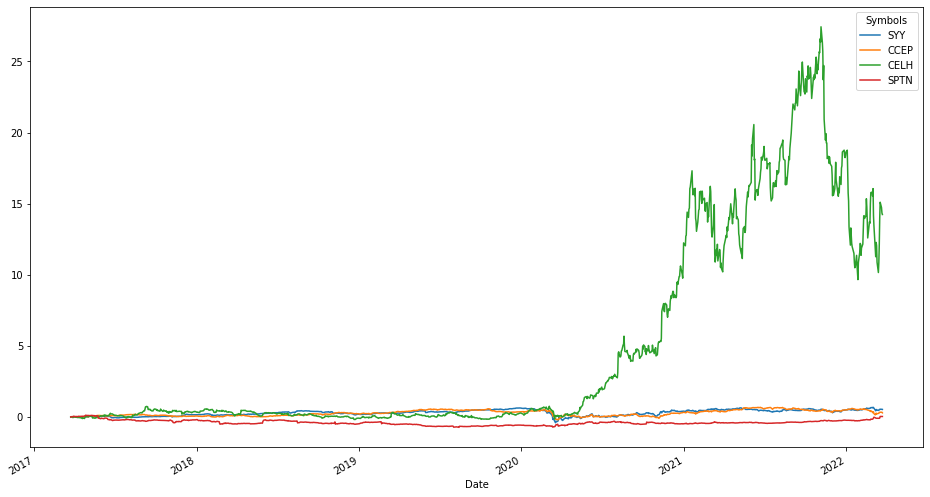

In [87]:
return_series_close.plot(figsize=(16,9))

In [88]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [89]:
highest.dropna(axis=1, how="all")

Symbols,CELH
Date,
2017-03-23,NaN
2017-03-24,NaN
2017-03-27,NaN
2017-03-28,NaN
2017-03-29,NaN
...,...
2022-03-17,NaN
2022-03-18,NaN
2022-03-21,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

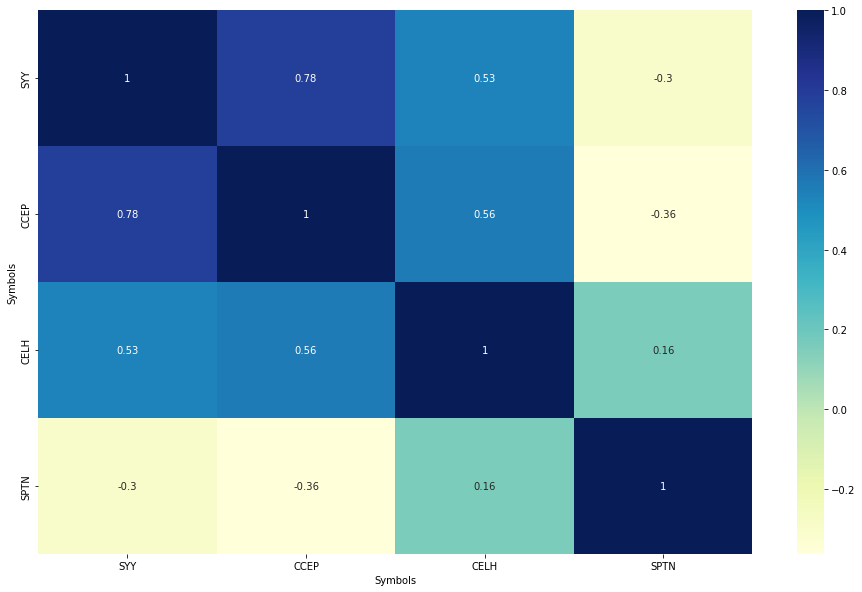

In [90]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [91]:
correlation = correlation[correlation < 0.4]
correlation

Symbols,SYY,CCEP,CELH,SPTN
Symbols,,,,
SYY,NaN,NaN,NaN,-0.297518
CCEP,NaN,NaN,NaN,-0.362545
CELH,NaN,NaN,NaN,0.157462
SPTN,-0.297518,-0.362545,0.157462,NaN


## Final DF for Consumer Defensive

In [92]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [93]:
indexes = []
for i in range(len(df2_consumer_d)):
    each = df2_consumer_d.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [94]:
chosen_consumer_d_df = df2_consumer_d.iloc[indexes]
chosen_consumer_d_df #4 stocks for consumer defensive sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.0500,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.434
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.0900,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.340
312,CELH,"Celsius Holdings, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,55.8575,0.717423,4.178984e+09,...,0.110,0.6720,146.993420,507.795440,810.769459,999.00,0.262318,0.729476,0.799096,1.082
844,SPTN,SpartanNash Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,27.0800,0.069797,9.733743e+08,...,1.780,-0.0879,14.104167,15.213484,1.681590,999.00,0.109154,0.525851,-0.036807,0.307


In [96]:
chosen_consumer_d_df.to_csv("selected_stocks_consumer_d.csv")

# Industrials Sector

## Filtering Stocks based on Sharpe Ratio

In [97]:
sharpe_list = []
for i in range(len(df_industrials)):
    each = df_industrials.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [98]:
sharpe_list

[-0.026,
 0.402,
 0.762,
 0.735,
 0.36,
 0.389,
 0.489,
 0.242,
 0.326,
 0.62,
 0.33,
 0.733,
 0.729,
 0.477,
 0.722,
 -0.036,
 1.231,
 0.516,
 0.402,
 0.311,
 0.663,
 0.51,
 0.18,
 0.246,
 0.213,
 0.717,
 0.036,
 0.382,
 0.095,
 0.874,
 -0.027,
 0.458,
 0.182,
 -0.292,
 0.321,
 0.232,
 0.355,
 0.214,
 0.451,
 0.649,
 0.557,
 0.318,
 0.474,
 0.307,
 0.602,
 -0.058,
 0.771,
 0.521,
 0.353,
 0.214,
 0.694,
 -0.174,
 0.446,
 0.199,
 0.653,
 0.349,
 0.807,
 0.404,
 0.453,
 0.093,
 0.565,
 -0.177,
 0.017,
 0.731,
 0.263,
 0.249,
 0.414,
 0.557,
 0.592,
 0.414,
 0.433,
 0.249,
 0.616,
 0.686,
 0.496,
 0.224,
 0.568,
 0.216,
 0.523,
 1.064,
 0.644,
 0.211,
 0.105,
 -0.094,
 0.567,
 1.035,
 0.369,
 0.193,
 0.432,
 0.633,
 0.39,
 0.289,
 0.487]

In [99]:
df_industrials["sharpe"] = sharpe_list
df_industrials

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_15996/77830193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrials["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043,-0.026
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.402
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.762
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.735
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.0900,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.432
908,USAK,"USA Truck, Inc.",Industrials,Increase,Below Fair Price,UnderValued,No Data,24.0400,0.108008,2.136505e+08,...,2.057,0.2760,9.246155,11.686924,30.639383,999.00,0.273259,0.638308,0.234642,0.633
918,VRRM,Verra Mobility Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,17.2700,0.056159,2.695225e+09,...,0.058,0.3080,18.178947,297.758640,27.507524,999.00,0.196676,NaN,NaN,0.390
920,VSEC,VSE Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,47.3300,0.148449,6.016543e+08,...,0.633,0.1960,12.198454,74.770935,33.682675,999.00,0.199108,0.472182,0.061138,0.289


In [100]:
df2_industrials = df_industrials[df_industrials["sharpe"] > 0.3]
df2_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.402
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.762
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.735
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.360
49,CMI,Cummins Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,216.0600,0.086095,3.090349e+10,...,15.211,0.1852,11.832420,14.204194,141.706114,19.36,0.144406,0.279770,0.098462,0.389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,TRS,TriMas Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,32.0300,0.056277,1.372706e+09,...,1.581,0.0934,13.020325,20.259329,10.168526,999.00,0.103076,0.319927,0.074926,0.369
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.0900,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.432
908,USAK,"USA Truck, Inc.",Industrials,Increase,Below Fair Price,UnderValued,No Data,24.0400,0.108008,2.136505e+08,...,2.057,0.2760,9.246155,11.686924,30.639383,999.00,0.273259,0.638308,0.234642,0.633
918,VRRM,Verra Mobility Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,17.2700,0.056159,2.695225e+09,...,0.058,0.3080,18.178947,297.758640,27.507524,999.00,0.196676,NaN,NaN,0.390


## Correlation between Stocks

In [101]:
returns_list = []
for i in range(len(df2_industrials)):
    each = df2_industrials.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [102]:
returns_list

[Symbols         ALLE
 Date                
 2017-03-23       NaN
 2017-03-24  0.002538
 2017-03-27  0.000401
 2017-03-28  0.003473
 2017-03-29  0.007347
 ...              ...
 2022-03-17  0.573470
 2022-03-18  0.578146
 2022-03-21  0.566257
 2022-03-22  0.569196
 2022-03-23  0.512022
 
 [1260 rows x 1 columns],
 Symbols          AME
 Date                
 2017-03-23       NaN
 2017-03-24 -0.000748
 2017-03-27  0.000748
 2017-03-28  0.008792
 2017-03-29  0.013655
 ...              ...
 2022-03-17  1.483165
 2022-03-18  1.520763
 2022-03-21  1.519454
 2022-03-22  1.518144
 2022-03-23  1.479424
 
 [1260 rows x 1 columns],
 Symbols          CAT
 Date                
 2017-03-23       NaN
 2017-03-24 -0.000867
 2017-03-27 -0.007807
 2017-03-28  0.007807
 2017-03-29  0.006831
 ...              ...
 2022-03-17  1.403773
 2022-03-18  1.395208
 2022-03-21  1.425567
 2022-03-22  1.414724
 2022-03-23  1.408869
 
 [1260 rows x 1 columns],
 Symbols         CHRW
 Date                
 2017-03-23   

In [103]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,ALLE,AME,CAT,CHRW,CMI,EFX,GD,GWW,HWM,J,...,RCMT,ROLL,SAIA,SBLK,TITN,TRNS,TRS,ULH,USAK,WWD
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,0.002538,-0.000748,-0.000867,-0.002703,-0.009526,0.002138,-0.010762,-0.004571,0.000000,-0.011505,...,1.464429e-02,-0.003353,-0.001170,0.022335,-0.017804,0.071918,-0.004808,-0.015444,-0.001372,0.005424
2017-03-27,0.000401,0.000748,-0.007807,-0.008496,-0.016818,-0.000663,-0.021471,-0.013548,-0.004498,-0.019357,...,8.368192e-03,-0.005732,-0.001170,0.027411,0.000000,0.070205,0.004808,-0.027027,0.010974,0.011602
2017-03-28,0.003473,0.008792,0.007807,-0.002060,-0.003482,0.004792,-0.005908,-0.005984,0.013493,-0.010409,...,6.276094e-03,0.008220,0.035088,0.188832,0.047478,0.061644,0.000000,0.011583,0.023320,0.019135
2017-03-29,0.007347,0.013655,0.006831,-0.005021,-0.003350,0.000295,-0.006700,-0.011969,-0.017991,0.006392,...,2.220446e-16,0.021307,0.030409,0.184772,0.150594,0.083048,0.002404,0.084942,0.012346,0.018834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,0.573470,1.483165,1.403773,0.339083,0.349428,0.765114,0.216027,1.069941,0.309595,1.520636,...,6.087866e-01,1.151417,5.603743,1.938071,1.215876,5.748287,0.578366,0.730502,2.076818,0.881272
2022-03-18,0.578146,1.520763,1.395208,0.350541,0.358231,0.777573,0.214549,1.085983,0.339205,1.578890,...,6.150626e-01,1.187973,5.830877,1.973604,1.310089,5.706336,0.592789,0.752896,2.122085,0.859575
2022-03-21,0.566257,1.519454,1.425567,0.355690,0.354290,0.753465,0.245358,1.103894,0.344828,1.554602,...,7.677823e-01,1.155635,5.576375,2.004061,1.472552,5.612158,0.591346,0.770656,2.111111,0.876149


<AxesSubplot:xlabel='Date'>

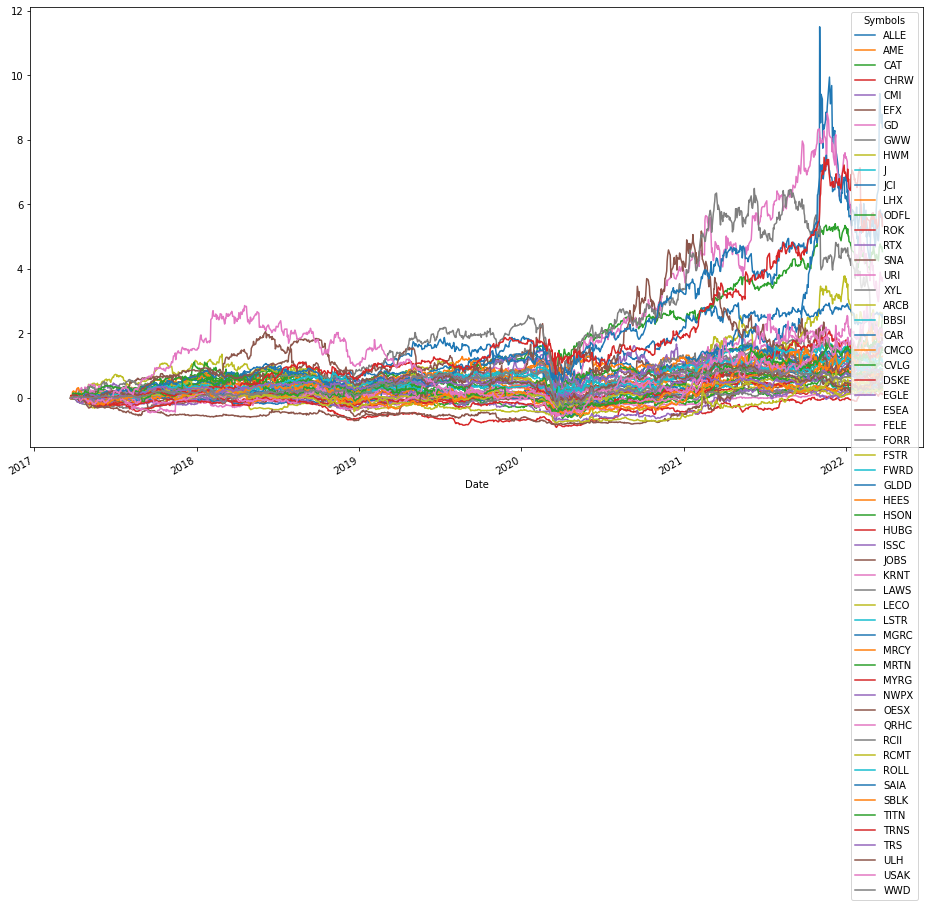

In [104]:
return_series_close.plot(figsize=(16,9))

In [105]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [106]:
highest.dropna(axis=1, how="all")

Symbols,CAR,SAIA,TRNS
Date,,,
2017-03-23,NaN,NaN,NaN
2017-03-24,NaN,NaN,NaN
2017-03-27,NaN,NaN,NaN
2017-03-28,NaN,NaN,NaN
2017-03-29,NaN,NaN,NaN
...,...,...,...
2022-03-17,NaN,NaN,NaN
2022-03-18,NaN,NaN,NaN
2022-03-21,NaN,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

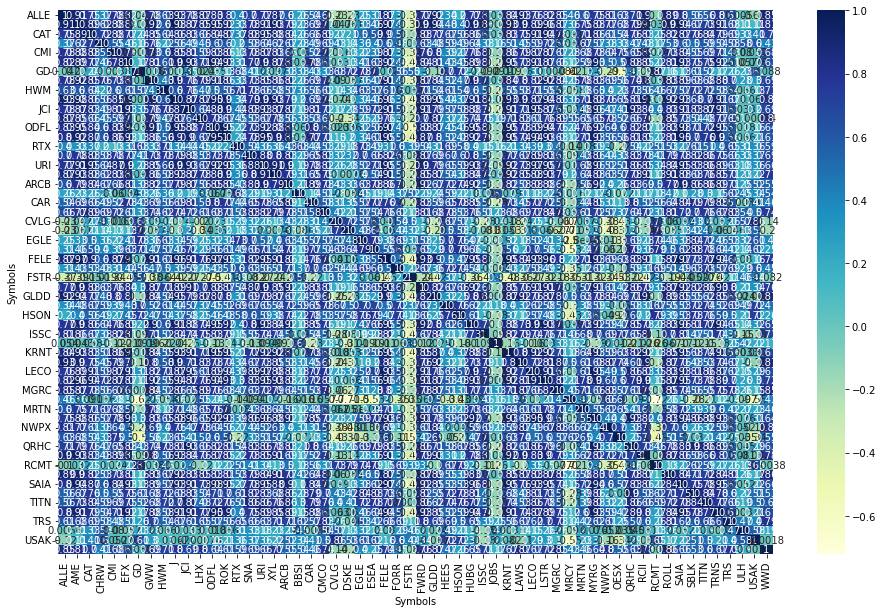

In [107]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [108]:
correlation = correlation[correlation < 0.4]
correlation

Symbols,ALLE,AME,CAT,CHRW,CMI,EFX,GD,GWW,HWM,J,...,RCMT,ROLL,SAIA,SBLK,TITN,TRNS,TRS,ULH,USAK,WWD
Symbols,,,,,,,,,,,,,,,,,,,,,
ALLE,NaN,NaN,NaN,0.365138,NaN,NaN,-0.041718,NaN,NaN,NaN,...,-0.100098,NaN,NaN,NaN,NaN,NaN,NaN,0.005621,-0.116605,NaN
AME,NaN,NaN,NaN,NaN,NaN,NaN,0.019616,NaN,NaN,NaN,...,0.032445,NaN,NaN,NaN,NaN,NaN,NaN,0.113610,0.114757,NaN
CAT,NaN,NaN,NaN,NaN,NaN,NaN,0.238669,NaN,NaN,NaN,...,0.249312,NaN,NaN,NaN,NaN,NaN,NaN,0.332653,NaN,NaN
CHRW,0.365138,NaN,NaN,NaN,NaN,NaN,0.157848,NaN,0.223815,NaN,...,0.170502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CMI,NaN,NaN,NaN,NaN,NaN,NaN,0.003756,NaN,NaN,NaN,...,0.023944,NaN,NaN,NaN,NaN,NaN,NaN,0.080137,0.051722,NaN
EFX,NaN,NaN,NaN,NaN,NaN,NaN,0.165948,NaN,NaN,NaN,...,0.217831,NaN,NaN,NaN,NaN,NaN,NaN,-0.056850,0.075923,NaN
GD,-0.041718,0.019616,0.238669,0.157848,0.003756,0.165948,NaN,0.017722,NaN,0.001071,...,NaN,0.157110,0.126851,NaN,NaN,0.171179,0.258122,0.232441,NaN,0.087559
GWW,NaN,NaN,NaN,NaN,NaN,NaN,0.017722,NaN,NaN,NaN,...,0.038338,NaN,NaN,NaN,NaN,NaN,NaN,0.282820,0.301911,NaN
HWM,NaN,NaN,NaN,0.223815,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066249,0.125939,NaN


## Final DF for Industrials

In [109]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [110]:
indexes = []
for i in range(len(df2_industrials)):
    each = df2_industrials.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [111]:
chosen_industrials_df = df2_industrials.iloc[indexes]
chosen_industrials_df #58 stocks for industrials sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.402
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.762
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.735
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.360
49,CMI,Cummins Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,216.0600,0.086095,3.090349e+10,...,15.211,0.1852,11.832420,14.204194,141.706114,19.36,0.144406,0.279770,0.098462,0.389
72,EFX,"Equifax, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,210.8300,0.188171,2.572168e+10,...,5.654,0.1360,23.957954,37.288647,94.411925,25.71,0.193030,0.306472,0.136700,0.489
87,GD,General Dynamics Corporation,Industrials,Increase,Above Fair Price,UnderValued,Not Sustainable,219.7900,0.147892,6.137042e+10,...,11.652,0.0855,17.653814,18.862854,65.368086,34.88,0.150484,0.247011,0.059897,0.326
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.3200,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.620
100,HWM,Howmet Aerospace Inc.,Industrials,Increase,Below Fair Price,UnderValued,No Data,34.7950,0.063164,1.486505e+10,...,0.661,0.3355,24.853570,52.639935,66.834588,999.00,0.214910,0.460425,0.058968,0.330
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.3100,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.729


In [112]:
chosen_industrials_df.to_csv("selected_stocks_industrials.csv")